<a href="https://colab.research.google.com/github/filipecalegario/intro-programacao-python/blob/main/11_Dados_Visualizacao/Pandas_preenchido_24_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

Pandas é uma biblioteca de Python que facilita a manipulação, preparação e limpeza dos dados.

<img  src="https://github.com/filipecalegario/intro-programacao-python/blob/main/11_Dados_Visualizacao/imgs/pandas.jpeg?raw=1" width="200" />

- Pandas é orientada a objetos.

- Criamos estruturas de dados pela construção de instâncias de diferentes classes.

- As duas classes mais importantes de Pandas são:

    - `Series`
    - `DataFrame`
    
- Pandas segue a convenção de Java de começar o nome das classes com uma letra maiúscula, enquanto as instâncias em letras minúsculas.
  
- Geralmente, importamos o módulo de Pandas e o assinalamos com a versão reduzida do nome: `pd`.

Para importar a biblioteca, usamos o comando:

In [ ]:
!pip install pandas

In [2]:
import pandas as pd

A partir de agora, sempre que você utilizar `pd` dentro do código, estará referenciado a biblioteca pandas.

# Series

Trata-se de uma lista (também chamado de array) de ```dados``` unidimensional, que possui um array de rótulos chamado ```index```. Cada elemento do array de dados possui uma associação com um elemento do *index*.

In [3]:
data = [1, 2, 3, 4, 5] # Esta linha cria uma lista
my_series = pd.Series(data) # Esta linha cria uma instância do objeto Series de pandas, os índices são automaticamente gerados.
my_series2 = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])  # Parecido com o dicionário de Python, índices são definidos
print(my_series)
print(my_series2)

0    1
1    2
2    3
3    4
4    5
dtype: int64
a    1
b    2
c    3
d    4
e    5
dtype: int64


<Axes: >

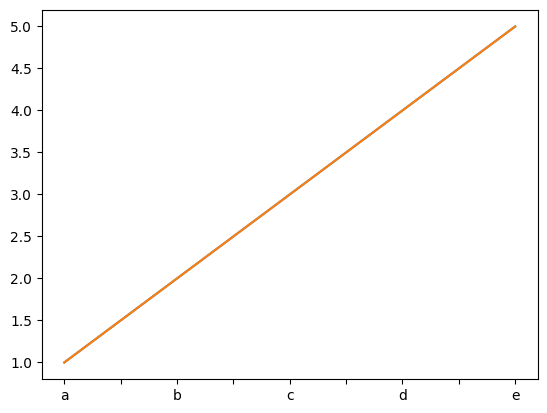

In [5]:
!pip install matplotlib
import matplotlib
my_series.plot()
my_series2.plot()

Ou  você pode usar o comando do Jupyter `%` chamado de Magic

<Axes: >

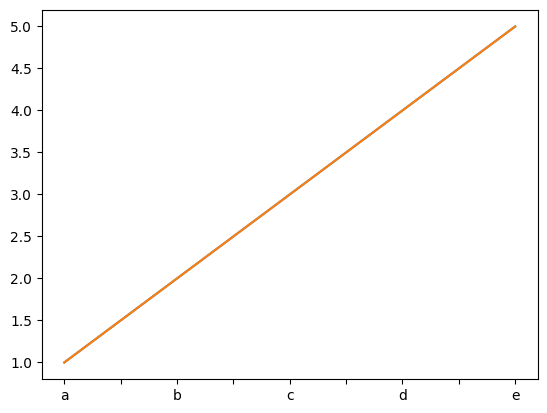

In [7]:
%matplotlib inline
my_series.plot()

## Criando uma Series de um dicionário

In [22]:
d = {'a' : 0., 'meu_indice' : 1., 'c' : 2.}
my_series = pd.Series(d)
# print(my_series2)
my_series

,0
a,0.0
meu_indice,1.0
c,2.0


## Indexando e Fatiando uma Series com `[]` ou .

- As séries podem ser acessadas usando a mesma sintaxe de listas e dicionários em Python.
- Usamos os rótulos no índice para acessar cada elemento.
- Também podemos usar o rótulo como um atributo `my_series.b`
- Podemos especificar um intervalo com `my_series[['b', 'c']]`

In [26]:
print(my_series['meu_indice'])
print(my_series.meu_indice)
minha_nova_serie = my_series[['a', 'c']]
print(minha_nova_serie)

1.0
1.0
a    0.0
c    2.0
dtype: float64


## Operações com Series

In [27]:
dados_entrada = {'a' : 0., 'b' : 1., 'c' : 2.}

minha_serie = pd.Series(dados_entrada)
print('Imprimindo o array "a":\n', minha_serie)
print('==========================')

b1 = 10 * minha_serie
print('Multiplicando diretamente por 10:\n', b1)
print('==========================')

b2 = minha_serie.multiply(10)
print('Multiplicando por 10 usando a função:\n', b2)
print('==========================')

c1 = minha_serie + b1
print('Somando "a" e "b" diretamente:\n', c1)
print('==========================')

c2 = pd.Series.add(minha_serie, b1)
print('Somando "a" e "b" com uma função:\n', c2)
print('==========================')



Imprimindo o array "a":
 a    0.0
b    1.0
c    2.0
dtype: float64
Multiplicando diretamente por 10:
 a     0.0
b    10.0
c    20.0
dtype: float64
Multiplicando por 10 usando a função:
 a     0.0
b    10.0
c    20.0
dtype: float64
Somando "a" e "b" diretamente:
 a     0.0
b    11.0
c    22.0
dtype: float64
Somando "a" e "b" com uma função:
 a     0.0
b    11.0
c    22.0
dtype: float64


In [ ]:
sum_a = pd.Series.sum(a)
print('Somando todos os elementos de "a":\n', sum_a)
print("==========================")

f = a ** 2
print('square a:\n', f)
print('Elevando todos os elementos de "a" a dois:\n', sum_a)
print("==========================")

x = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.})
y = pd.Series({'a' : 3., 'b' : 4., 'c' : 5.})
z = x + y
print('Adicionando duas Series:\n', z)
print("==========================")

## Séries Temporais (Time Series)

- Times Series em pandas associam tempos específicos com valores em cada linha

In [ ]:
dates = pd.date_range('1/1/2000', periods=5)
print(dates)

In [ ]:
time_series = pd.Series(data, index=dates)
time_series

### Plotando uma Série Temporal

- Com os valores associados ao tempo, o comando `plot` pode ser usado para se obter uma visualização rápida na forma de um gráfico de linhas

In [ ]:
ax = time_series.plot()

In [ ]:
type(time_series)

## Filtrando dados

In [ ]:
# cria a série
num = pd.Series([1, 2, 3, 4, 5, 6], index=['n1', 'n2', 'n3', 'n4', 'n5', 'n6'])

# filtra números pares
par = num[num % 2 == 0]

# filtra números impares
impar = num[num % 2 != 0]

print('todos')
print(num)
print('pares:')
print(par)
print('impares:')
print(impar)

# DataFrames

- O `pandas` fornece uma poderosa estrutura de dados chamada DataFrames (uma tradução possível seria Quadro de Dados, mas ninguém usa assim).

- É semelhante, mas não idêntico a:
     - uma tabela em um banco de dados relacional,
     - uma planilha Excel,
     - um dataframe em R.

- Um DataFrame tem várias colunas, cada uma das quais pode conter um tipo *diferente* de valor.

- Como uma série, possui um índice que fornece um rótulo para cada linha.


## Criando um DataFrame a partir de dados externos
- Os DataFrames podem ser lidos e gravados de/para:
     - consultas de banco de dados, tabelas de banco de dados
     - arquivos CSV
     - arquivos JSON
     - etc
    
- Esteja ciente de que os DataFrames ficam armazenados na memória:
     - Se você ler uma grande quantidade de dados, seu computador pode travar
     - Com big data, normalmente você leria um subconjunto ou resumo dos dados (ver mais sobre select statement)

## Criando um DataFrame a partir de estruturas de dados Python

- Os quadros de dados podem ser construídos a partir de outras estruturas de dados:
  - dicionário de listas
  - dicionário de dicionários
  - dicionário de Series
  - uma única Series
  - outro DataFrame

## Exemplo: Criando um DataFrame de várias Series
- Pandas codifica valores ausentes como `NaN` em vez de `None`
- A série deve ter chaves correspondentes para cada linha correspondente.

In [ ]:
d = {
        'x' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'y' : pd.Series([4.,  6., 7.], index=['a',  'c', 'd']),
        'z' : pd.Series([0.2, 0.3, 0.4], index=[ 'b', 'c', 'd'])
}
print(type(d))

df = pd.DataFrame(d)
print (df)

## Plotando DataFrames

- Ao plotar um DataFrame, cada coluna é plotada como sua própria série no mesmo gráfico.

- Os nomes das colunas são usados para rotular cada série.

- Os nomes das linhas (índice) são usados para rotular o eixo x.

In [ ]:
ax = df.plot()

## Funções e DataFrames

- Podemos fazer cálculos e funções com DataFrames como Series.
- As funções normalmente retornarão um DataFrames ou uma Serie, dependendo.
- Para fazer uma cópia, não defina dois DataFrames usando o comando de atribuição, usem o método copy: `df2= df.copy()`

In [ ]:
df2 = df.copy()
print(df, '\n', df2)

## Estatísticas resumidas
- Para obter estatísticas resumidas rapidamente sobre valores numéricos, use o método `describe`.
- Você receberá um aviso se houver valores ausentes.
- O resultado é em si um DataFrame, que podemos fatiar `dfstats.y['mean']`.

In [ ]:
dfstats = df.describe()
print(dfstats)
# Vejam a diferença de usar o interactive output
dfstats

## Acessando os rótulos de linha e coluna

- Os rótulos das linhas (índice) podem ser acessados através do `df.index`.
- Os rótulos das colunas podem ser acessados através de `df.columns`.

In [ ]:
print(df.index)
print(df.columns)

## Carregando arquivos com Pandas
- Sempre que você tiver um conjunto de dados com uma variedade de campos de vários tipos, carregá-lo no Pandas é uma boa estratégia.
- Você pode carregar de um arquivo local ou de um URL.

In [ ]:
frame_iris = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/spring2019-materials/master/input/iris.csv')
frame_iris

## Exemplo: Carregando dados da bolsa

Vamos iniciar com um arquivo CSV.

A biblioteca Pandas carrega os dados em uma estrutura de dados própria, indexando cada linha, separando variáveis com delimitadores customizáveis, inferindo qual o tipo de dado de cada coluna, convertendo os dados (se necessário, por exemplo, texto para número), fazendo o tratamento de datas, valores ausentes e valores incorretos.

Para isso, utilizaremos uma base com o histórico de cotação das ações preferenciais da Petrobras no período de 07/03/2020 até 07/04/2020, que está no arquivo PETR4 Dados ``PETR4 Dados Históricos.csv``. Para tanto, utilizaremos os seguintes comandos:

In [ ]:
nome_acao = 'PETR4 Dados Históricos.csv'
petr4 = pd.read_csv(nome_acao, decimal=",")
type(petr4)

In [ ]:
petr4

O resultado é um objeto, chamado ``petr4``, que armazena um ``DataFrame`` Pandas. Note o uso de ``decimal=","`` para indicar que o arquivo está utilizando o separador decimal brasileiro.  Para ter uma ideia de sua estrutura, vamos imprimir as primeiras linhas do DataFrame, usando o seguinte comando para isso:

Um ``DataFrame`` se assemelha a uma estrutura de matriz.

Cada linha da matriz possui um índice, que aparece na coluna mais à esquerda. Cada coluna, possui um índice, que é o próprio nome da coluna.

Se quiséssemos imprimir as últimas linhas do Data Frame ``petr4``, poderíamos usar a função ``tail``.

A função ``head``/``tail`` imprime a 5 primeiras/últimas linhas. É possível controlar o número de linhas impressas, passando um parâmetro. Por exemplo, vamos imprimir apenas as duas primeiras linhas.

In [ ]:
petr4.head()

In [ ]:
petr4.tail()

Se desejarmos visualizar apenas os nomes das colunas, podemos usar:

In [ ]:
petr4.columns

## Indexando e Fatiando colunas de DataFrames
- Maneira simples de selecionar coluna(s) `frame[[nome(s) da coluna]]`.
- Podem ter uma coluna (`df['x']`) ou múltiplas (`df[['x', 'y']]`).
- Ao especificar uma coluna, pode-se usar a notação de ponto simplificada `df.x`.
- Quando incluímos várias colunas, a fatia resultante é um DataFrame.
- Quando recuperamos uma única coluna, o resultado é uma Serie.
- Quando recuperamos várias colunas, o resultado é um Dataframe.

In [ ]:
datas = petr4['Data']
datas

Note que, ao extrairmos os dados referenciados pela coluna `Data`, obtivemos um conjunto de valores em uma estrutura unidimensional. Cada um desses valores possuem um índice associado. Isso é uma...?

In [ ]:
type(datas)

In [ ]:
print(petr4[['Data', 'Máxima']])

## Jogando fora (Dropping) colunas de um DataFrame

Tirando, por exemplo, a coluna de variação do DataFrame `petr4`

In [ ]:
petr4.head()

In [ ]:
petr4_copy = petr4.copy()
petr4_copy.head()

In [ ]:
petr4_copy.drop(columns = ['Var%', 'Vol.'])
petr4_copy.head()

Não apagou, não é? Veja por que:

In [ ]:
petr4_copy_drop = petr4_copy.drop(columns = ['Var%', 'Vol.'])
petr4_copy_drop.head()

In [ ]:
petr4_copy.drop(columns = ['Var%', 'Vol.'], inplace=True)
petr4_copy

## Renomeando colunas

In [ ]:
petr4.rename(columns = {'Vol.': 'Volume', 'Var%': 'Variação'}, inplace = True)
petr4

## Fazendo uma cópia do DataFrame

In [ ]:
df = petr4.copy()
df.head(2)

## Selecionando linhas

In [ ]:
print (df[0:3])     # Seleciona linhas 0 a 2
print (df.iloc[0:3,:])     # Seleciona linhas 0 a 2
print (df.iloc[0:3,])      # Seleciona linhas 0 a 2
print (df.iloc[0:3])       # Seleciona linhas 0 a 2
print (df.iloc[[1,2,4]])   # Seleciona linhas 1, 2, and 4

Mais sobre a documentação do método `iloc`:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html

## Limpando e convertendo dados

In [ ]:
df['Variação'] = df['Variação'].str.replace(',','.')
df['Variação'] = df['Variação'].str.replace('%','')
df['Variação'] = pd.to_numeric(df['Variação'], errors='raise')
df

## Filtrando dados (Indexação Lógica)

- Os filtros são a seleção de linhas com base em critérios.
- Podemos selecionar com base em critérios específicos.


In [ ]:
# Como elemento fundamental de um filtro, temos uma lista de booleanos baseada em algum tipo de condição
print(df)
df['Último'] >= 30

In [ ]:
df[df['Último'] >= 30]

Poderíamos ter organizado em uma variável:

In [ ]:
maiores_trinta = df['Último'] >= 30
df[maiores_trinta]

In [ ]:
df.loc[maiores_trinta, ['Data', 'Último']]

Mais informações sobre o método `loc`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [ ]:
df['Maior que 30'] = 0  # Definimos o valor default
df.loc[df['Último'] >= 30, 'Maior que 30'] = 1 # Aqui então, mudamos todas as linhas para 1 caso >= 30
print(df['Maior que 30'])

In [ ]:
df['Maior que 30'] = 'Ruim'  # Definimos o valor default
df.loc[df['Último'] >= 30, 'Maior que 30'] = 'Bom' # Aqui então, mudamos todas as linhas para 'Bom' caso >= 30
print(df['Maior que 30'])

### Filtrando datas

O que tem errado com o código abaixo?

In [ ]:
df[df['Data'] >= '01.11.2022']

In [ ]:
df.dtypes

Uma data em Pandas é representada pelo type `datetime64`, assim, no caso acima, a coluna Data está apenas como string.

Como converter a string em um formato de data?

In [ ]:
df['Data Convertida'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
df.head()

In [ ]:
df.dtypes

In [ ]:
df[df['Data Convertida'] >= '2022-11-01']

Mais informações sobre a função `pandas.to_datetime()`

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

## Juntando dados de DataFrames diferentes

- Muitas vezes você precisa combinar DataFrames
- Com colunas correspondentes para as mesmas linhas (vinculação de coluna, _column bind_)
- Adicionar linhas para as mesmas colunas (vinculação de linha, _row bind_)

In [ ]:
df  = pd.read_csv('PETR4 Dados Históricos.csv',          decimal=",", parse_dates = ['Data'], dayfirst = True)
df2 = pd.read_csv('PETR4 Dados Históricos_setembro.csv', decimal=",", parse_dates = ['Data'], dayfirst = True)
print(df.dtypes)
print(df2.dtypes)

In [ ]:
df_todos = pd.concat([df, df2])
df_todos.info()

In [ ]:
print("===============")
print(df)
print("===============")
print(df2)

#This will stack the 2 dataframes vertically on top of one another
dfbyrow=pd.concat([df, df2])  #This is equivalent to a rowbind in R.
print (dfbyrow)
dfbyrow=pd.concat([df, df2], axis = 1)  #This is equivalent to a rowbind in R.
print (dfbyrow)

## Ordenando DataFrames

In [ ]:
df

In [ ]:
df.sort_values(by = ['Data'], ascending = True)

__________________________________________________

# Plotando com plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df,
                x='Data',
                y='Último')
fig.show()

In [ ]:
fig = px.scatter(df,
                x='Data',
                y='Último')
fig.show()

In [ ]:
fig = px.line(df,
                x='Data',
                y='Último')
fig.show()

In [ ]:
fig = px.bar(df,
                x='Data',
                y='Último')
fig.show()

Para mais informações de outras bibliotecas de visualização de dados para serem usadas com Pandas:

https://aeturrell.github.io/coding-for-economists/vis-common-plots.html

# Pandas Cheat Sheets

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://raw.githubusercontent.com/shervinea/mit-15-003-data-science-tools/master/en/study-guide-data-manipulation-with-python.pdf